In [1]:
# Window
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { width:90% !important; }</style>"))

In [2]:
# Packages
from sympy import *
π = pi

# Singular integral kernel

$\newcommand{\dif}{\,\mathrm{d}}\newcommand{\IK}{\mathsf{I}}$
We are interested in computing some exact convolutions against a singular kernel on the squared domain $\square = (0,1)^2$. In particular, we are interested in the Newtonian kernel $K(x) = (2\pi)^{-1} \log |x| = (2\pi)^{-1} \log \sqrt{x_1^2 + x_2^2}$. The convolution operator is well defined for $\rho \in L^p_{\mathrm c} (\square)$, considering the fact that $K \in L^1_{\mathrm{loc}}(\square)$, for which
\begin{align*}
    K \ast \rho \, (x) = \iint\limits_{\mathbb{R}^2} K(x-y) \, \rho(y) \dif y 
    = \iint\limits_{\square} K(x-y) \, \rho(y) \dif y .
\end{align*}
There are two choices now: **(a)** we limit $K$ to be defined inside $\square$, or **(b)** we allow values outside $\square$ to be considered in the difference $x-y$. 
Computationally speaking, we are interested in the second case; however, we can obtain an expression for **(b)** by providing a solution of **(a)** as we will see later on.

---

## Case **(a)**

In what follows, we will consider case **(a)**. For this, we introduce the [extension operator](https://etheses.whiterose.ac.uk/3917/1/thesis.pdf) $\mathcal{E}$ such that
\begin{align*}
    \mathcal{E}K(x) = 
    \begin{cases}
        K(x) & \text{if } x \in \square, \\
        0    & \text{otherwise}.
    \end{cases}
\end{align*}
In this case, we have that the difference $x-y$ is only included in $\square$ for $y \in [0,x_1] \times [0,x_2]$, hence
\begin{align*}
    K \ast \rho\, (x) &= \int\limits_0^1 \int\limits_0^1 \mathcal{E} K (x-y) \, \rho(y) \dif y = \int\limits_0^{x_1} \int\limits_0^{x_2} K (x-y) \, \rho(y) \dif y.
\end{align*}
Due to Fubini–Tonelli's theorem or via the simple change of variables $u = x- y$, we further have that
\begin{align*}
    K \ast \rho \, (x) &= \int\limits_0^{x_1} \int\limits_0^{x_2} K (u) \, \rho(x-u) \dif u.
\end{align*}
Notice that a simple consequence of our choice of $K$ is that $K \ast \rho \, (x) = 0$ for $ x \in \big\{ (0,x_2): x_2 \in [0,1] \big\} \cup \big\{ (x_1,0): x_1 \in [0,1] \big\} $.

Now, let us compute an exact convolution. For this, we will select $\rho = \mathbb{1}_{\square}$. As a result, we have that $K \ast \rho \, (x) = \int\limits_0^{x_1} \int\limits_0^{x_2} K(u) \dif u$. Notice that $K$ has a rotational symmetry around the origin, pointing towards computing its integral by a change to polar coordinates. To represent $\square$ under polar coordinates, we have to decompose it into [two regions](https://math.stackexchange.com/a/2189774/290485), one that lies below the hypotenuse of the triangle given by origin, $x$, and $(0,x_1)$, and the other region is the complement of the former with $\square$; i.e., the triangle with vertices in the origin, $x$, and $(x_2,0)$:
\begin{align*}
    \square = \Big\{ (r,\theta):\, 0 \leq r \leq \frac{x_1}{\cos \theta} \, \wedge \, 0 \leq \theta \leq \varphi \Big\} 
         \cup \Big\{ (r,\theta):\, 0 \leq r \leq \frac{x_2}{\sin \theta} \, \wedge \, \varphi \leq \theta \leq \frac{\pi}{2} \Big\} .
\end{align*}
The angle $\varphi = \arctan \frac{x_2}{x_1}$ is the angle of $x$. As a result, we can write the convolution integral as
\begin{align*}
  (2\pi)  K \ast \rho \, (x) = \int\limits_0^\varphi \int\limits_0^{{x_1}{/\cos \theta}} r \log r \, \dif r \dif \theta
  +
  \int\limits_\varphi^{ \pi/2 } \int\limits_0^{{x_2}{/\sin \theta}} r \log r \, \dif r \dif \theta.
\end{align*}
Notice that by rotational symmetry, we could compute the first integral symbolically, and then replace the second with $x_2$ as radius limit and $\pi/2 - \varphi$ instead.

In [3]:
r, φ, θ, x_1, x_2 = symbols('r φ θ x_1 x_2');    display(integrate(r * log(r), r))
display( integrate(r * log(r), (r, 0, x_1/cos(θ))) );    display( integrate(r * log(r), (r, 0, x_2/sin(θ))) )

r**2*log(r)/2 - r**2/4

x_1**2*log(x_1/cos(θ))/(2*cos(θ)**2) - x_1**2/(4*cos(θ)**2)

x_2**2*log(x_2/sin(θ))/(2*sin(θ)**2) - x_2**2/(4*sin(θ)**2)

The function $f(r) = r \log r$ has a computable primitive (using integration by parts). For which we obtain the following expressions:
\begin{align*}
  (2\pi)  K \ast \rho \, (x) = \frac{x_1^2}{4} \int\limits_0^\varphi 2\frac{\log {x_1}{/ \cos \theta}}{\cos^2 \theta} - \frac{1}{\cos^2 \theta}  \dif \theta
  +
  \frac{x_2^2}{4}  \int\limits_\varphi^{ \pi/2 } 2\frac{\log {x_2}{/ \sin \theta}}{\sin^2 \theta} - \frac{1}{\sin^2 \theta}  \dif \theta.
\end{align*}

Again we have some primitives that can be found for each term:

In [4]:
print(trigsimp(integrate(-cos(θ)**-2, (θ, 0, φ) )), trigsimp(integrate(-sin(θ)**-2, (θ, φ, π/2) )))

-tan(φ) -1/tan(φ)


In [5]:
trigsimp( diff( tan(θ) * ( log( x_1 * sec(θ)) - 1 ) + θ, θ) ) == log(x_1/cos(θ)) * cos(θ)**-2

True

In [6]:
trigsimp( diff( -cot(θ) * ( log( x_2 * csc(θ)) - 1 ) + θ, θ) ) == log(x_2/sin(θ)) * sin(θ)**-2

True

In [7]:
display( (tan(θ) * ( log( x_1 * sec(θ)) - 1 ) + θ).subs(θ, φ) - (tan(θ) * ( log( x_1 * sec(θ)) - 1 ) + θ).subs(θ, 0) )

φ + (log(x_1*sec(φ)) - 1)*tan(φ)

In [8]:
(-cot(θ) * ( log( x_2 * csc(θ)) - 1 ) + θ).subs(θ,π/2) - (-cot(θ) * ( log( x_2 * csc(θ)) - 1 ) + θ).subs(θ,φ)

-φ + (log(x_2*csc(φ)) - 1)*cot(φ) + pi/2

Hence we obtain the following expressions:
\begin{align*}
    \int\limits_0^\varphi 2\frac{\log {x_1}{/ \cos \theta}}{\cos^2 \theta} - \frac{1}{\cos^2 \theta}  \dif \theta &=
    2\varphi + 2 \tan \varphi \log x_1 \sec \varphi - 2\tan \varphi  - \tan \varphi
    = - 3 \tan \varphi + 2 \tan \varphi \log x_1 \sec \varphi + 2\varphi
    \\
    \int\limits_\varphi^{ \pi/2 } 2\frac{\log {x_2}{/ \sin \theta}}{\sin^2 \theta} - \frac{1}{\sin^2 \theta}  \dif \theta &= 
    -3 \cot \varphi + 2 \cot \varphi \log x_2 \csc \varphi - 2\varphi + \pi
\end{align*}

Now, we have to consider the fact that $\varphi = \arctan \frac{x_2}{x_1}$, for which we have that
\begin{align*}
    \tan \varphi = \frac{x_2}{x_1}, \qquad
    \cot \varphi = \frac{x_1}{x_2}, \qquad
    \sec \varphi = \frac{|x|}{x_1}, \qquad
    \csc \varphi = \frac{|x|}{x_2}
\end{align*}

In [9]:
tan( atan(x_2/x_1) ), sec(atan(x_2/x_1)), cot( atan(x_2/x_1) ), csc(atan(x_2/x_1))

(x_2/x_1, sqrt(1 + x_2**2/x_1**2), x_1/x_2, x_1*sqrt(1 + x_2**2/x_1**2)/x_2)

Replacing this in the previous expressions, we get:
\begin{align*}
    \int\limits_0^\varphi 2\frac{\log {x_1}{/ \cos \theta}}{\cos^2 \theta} - \frac{1}{\cos^2 \theta}  \dif \theta &=
    \frac{x_2}{x_1} \big[ 2 \log |x| - 3 \big] + 2\varphi
    \\
    \int\limits_\varphi^{ \pi/2 } 2\frac{\log {x_2}{/ \sin \theta}}{\sin^2 \theta} - \frac{1}{\sin^2 \theta}  \dif \theta &= 
    \frac{x_1}{x_2} \big[ 2 \log |x| - 3 \big] - 2\varphi + \pi
\end{align*}

Now, we can collect the terms of both expressions to obtain:
\begin{align*}
  (2\pi)  K \ast \rho \, (x) &= 
  \frac{x_1 x_2}{4} \big[ 2 \log |x| - 3 \big] + \frac{x_1^2}{2} \varphi 
  +
  \frac{x_1 x_2}{4} \big[ 2\log |x| - 3 \big] + \frac{x_2^2}{4} [ \pi - 2\varphi]
  \\
  &= 
  \frac{x_1 x_2}{2} \big[ 2 \log |x| - 3 \big] + \frac{1}{2} (x_1^2 - x_2^2) \operatorname{atan2}(x_2,x_1)  + \frac{\pi}{4} x_2^2.
\end{align*}
Notice that by continuity, this last expression is well defined even for the cases $x_1 = 0$ and $x = 0$. Hence we obtain the final expression
\begin{align*}
  K \ast \rho \, (x) &= 
  \frac{1}{4\pi} x_1 x_2 \big[ 2 \log |x| - 3 \big] + \frac{1}{4\pi} (x_1^2 - x_2^2) \operatorname{atan2}(x_2,x_1)  + \frac{1}{8} x_2^2
  \\
  &=
  \frac{1}{2\pi} x_1 x_2 \log |x| + \frac{1}{4\pi} (x_1^2 - x_2^2) \operatorname{atan2}(x_2,x_1)  + \frac{1}{8} x_2^2 - \frac{3}{4\pi} x_1 x_2.
\end{align*}

To finish, let us call $\mathsf{I}$ to the expression:
\begin{align*}
    \mathsf{I}(x) = \frac{1}{2\pi} x_1 x_2 \log |x| + \frac{1}{4\pi} (x_1^2 - x_2^2) \operatorname{atan2}(x_2,x_1)  + \frac{1}{8} x_2^2 - \frac{3}{4\pi} x_1 x_2.
\end{align*}
We will see how we can use this later on for case **(b)**.

---

## Case **(b)**

Let us consider back the original convolution but with $K$ defined in the whole of $\mathbb{R}^2$:
\begin{align*}
    K \ast \rho \,(x) = \int\limits_0^1 \int\limits_0^1 K (x-y) \, \rho(y) \dif y.
\end{align*}
Now consider the change of variables $u = x-y$, then we have that (after two changes of sign)
\begin{align*}
    K \ast \rho \,(x) = \int\limits_{x_2-1}^{x_2} \int\limits_{x_1-1}^{x_1} K (u) \, \rho(x-u) \dif u.
\end{align*}
Notice that we are only interested in the values for $x\in \square$. Here, the domain $[x_1-1,x_1] \times [x_2-1,x_2]$ can be decomposed as $\big([x_1-1,0] \times [x_2-1,0] \big) \cup \big( [x_1-1,0] \times [0,x_2] \big) \cup \big( [0,x_1] \times [x_2-1,0] \big) \cup \big( [0,x_1] \times [0,x_2] \big) $. If $\rho$ is radially symmetric, then we can not only decompose the integral above as a sum, but also modify the domain of integration of each integrand by transforming each subregion to an equivalent block in $\square$:
\begin{align*}
    K \ast \rho \,(x) = 
    \int\limits_{0}^{x_2} \int\limits_{0}^{x_1} K (u) \, \rho(x-u) \dif u  \, +
    \int\limits_{0}^{x_2} \int\limits_{0}^{1-x_1} K (u) \, \rho(x-u) \dif u \, +
    \int\limits_{0}^{1-x_2} \int\limits_{0}^{x_1} K (u) \, \rho(x-u) \dif u \, +
    \int\limits_{0}^{1-x_2} \int\limits_{0}^{1-x_1} K (u) \, \rho(x-u) \dif u .
\end{align*}

For the case $\rho = \mathbb{1}_\square$, we can use the prior case to obtain:
\begin{align*}
    K \ast \rho \,(x) = \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2).
\end{align*}

In [10]:
y_1, y_2 = symbols('y_1 y_2');

In [11]:
I = y_1 * y_2 * log( sqrt(y_1**2 + y_2**2) )/(2*π) + 1/(4*π) * (y_1**2 - y_2**2) * atan2(y_2,y_1) + y_2**2 /8 - 3 * y_1 * y_2 /(4*π)
I

y_1*y_2*log(sqrt(y_1**2 + y_2**2))/(2*pi) - 3*y_1*y_2/(4*pi) + y_2**2/8 + (y_1**2 - y_2**2)*atan2(y_2, y_1)/(4*pi)

In [12]:
display((I.subs({y_1:x_1, y_2:x_2}) + I.subs({y_1:x_1, y_2:1 - x_2}) + I.subs({y_1:1 - x_1, y_2:x_2}) + I.subs({y_1:1-x_1, y_2:1-x_2})).trigsimp().simplify())
print((I.subs({y_1:x_1, y_2:x_2}) + I.subs({y_1:x_1, y_2:1 - x_2}) + I.subs({y_1:1 - x_1, y_2:x_2}) + I.subs({y_1:1-x_1, y_2:1-x_2})).trigsimp().simplify())

(x_1*x_2*log(x_1**2 + x_2**2) - 3*x_1*x_2 - x_1*(x_2 - 1)*log(x_1**2 + (x_2 - 1)**2) + 3*x_1*(x_2 - 1) - x_2*(x_1 - 1)*log(x_2**2 + (x_1 - 1)**2) + 3*x_2*(x_1 - 1) + (x_1 - 1)*(x_2 - 1)*log((x_1 - 1)**2 + (x_2 - 1)**2) - 3*(x_1 - 1)*(x_2 - 1) + (x_1**2 - x_2**2)*atan2(x_2, x_1) + (x_1**2 - (x_2 - 1)**2)*atan2(1 - x_2, x_1) - (x_2**2 - (x_1 - 1)**2)*atan2(x_2, 1 - x_1) + pi*(x_2**2 + (x_2 - 1)**2) + ((x_1 - 1)**2 - (x_2 - 1)**2)*atan2(1 - x_2, 1 - x_1))/(4*pi)

(x_1*x_2*log(x_1**2 + x_2**2) - 3*x_1*x_2 - x_1*(x_2 - 1)*log(x_1**2 + (x_2 - 1)**2) + 3*x_1*(x_2 - 1) - x_2*(x_1 - 1)*log(x_2**2 + (x_1 - 1)**2) + 3*x_2*(x_1 - 1) + (x_1 - 1)*(x_2 - 1)*log((x_1 - 1)**2 + (x_2 - 1)**2) - 3*(x_1 - 1)*(x_2 - 1) + (x_1**2 - x_2**2)*atan2(x_2, x_1) + (x_1**2 - (x_2 - 1)**2)*atan2(1 - x_2, x_1) - (x_2**2 - (x_1 - 1)**2)*atan2(x_2, 1 - x_1) + pi*(x_2**2 + (x_2 - 1)**2) + ((x_1 - 1)**2 - (x_2 - 1)**2)*atan2(1 - x_2, 1 - x_1))/(4*pi)


In [13]:
(I.subs({y_1:x_1, y_2:x_2}) + I.subs({y_1:x_1, y_2:1 - x_2}) + I.subs({y_1:1 - x_1, y_2:x_2}) + I.subs({y_1:1-x_1, y_2:1-x_2})).trigsimp().simplify() * 4*π

x_1*x_2*log(x_1**2 + x_2**2) - 3*x_1*x_2 - x_1*(x_2 - 1)*log(x_1**2 + (x_2 - 1)**2) + 3*x_1*(x_2 - 1) - x_2*(x_1 - 1)*log(x_2**2 + (x_1 - 1)**2) + 3*x_2*(x_1 - 1) + (x_1 - 1)*(x_2 - 1)*log((x_1 - 1)**2 + (x_2 - 1)**2) - 3*(x_1 - 1)*(x_2 - 1) + (x_1**2 - x_2**2)*atan2(x_2, x_1) + (x_1**2 - (x_2 - 1)**2)*atan2(1 - x_2, x_1) - (x_2**2 - (x_1 - 1)**2)*atan2(x_2, 1 - x_1) + pi*(x_2**2 + (x_2 - 1)**2) + ((x_1 - 1)**2 - (x_2 - 1)**2)*atan2(1 - x_2, 1 - x_1)

Let's see if we can simplify just the polynomial terms:

In [14]:
a_poly = - 3*x_1*x_2 + 3*x_1*(x_2 - 1) + 3*x_2*(x_1 - 1) - 3*(x_1 - 1)*(x_2 - 1) + pi*(x_2**2 + (x_2 - 1)**2)
display(a_poly)
a_poly = a_poly.simplify()
a_poly

-3*x_1*x_2 + 3*x_1*(x_2 - 1) + 3*x_2*(x_1 - 1) - (3*x_1 - 3)*(x_2 - 1) + pi*(x_2**2 + (x_2 - 1)**2)

2*pi*x_2**2 - 2*pi*x_2 - 3 + pi

So we define $j_1 (x) = 2\pi x_2 (x_2 - 1) + (\pi - 3)$.

Now let's consider the logarithmic terms:

In [15]:
a_log = x_1*x_2*log(x_1**2 + x_2**2) - x_1*(x_2 - 1)*log(x_1**2 + (x_2 - 1)**2) - x_2*(x_1 - 1)*log(x_2**2 + (x_1 - 1)**2) +  (x_1 - 1)*(x_2 - 1)*log((x_1 - 1)**2 + (x_2 - 1)**2)
display(a_log)

x_1*x_2*log(x_1**2 + x_2**2) - x_1*(x_2 - 1)*log(x_1**2 + (x_2 - 1)**2) - x_2*(x_1 - 1)*log(x_2**2 + (x_1 - 1)**2) + (x_1 - 1)*(x_2 - 1)*log((x_1 - 1)**2 + (x_2 - 1)**2)

There is not much we can do here, but we can rewrite it as:
\begin{align*}
    j_2(x) &= 2 \Big[ x_1 x_2 \log |x|  - x_1 (x_2-1) \log |x-e_2| - x_2 (x_1 -1) \log |x-e_1| + (x_1 - 1) (x_2 - 1) \log |x-1| \Big]
    \\
    &= 2 x_1 x_2  \Big[  \log|x| - \log |x-e_2| - \log |x - e_1| + \log |x-1| \Big] + 2 \Big[ x_1 \log |x-e_2| + x_2 \log |x - e_1| + (1 - x_1 - x_2)\log |x-1| \Big]
    \\
    &= 2 \Big[ x_1 x_2 \log \frac{ |x| |x-1| }{ |x-e_1| |x - e_2| } +  x_1 \log \frac{|x-e_2|}{|x-1|} + x_2 \log \frac{|x-e_1|}{|x-1|} + \log |x-1| \Big] 
\end{align*}

We cannot do much with the angles:

In [16]:
(  (x_1**2 - x_2**2)*atan2(x_2, x_1) + (x_1**2 - (x_2 - 1)**2)*atan2(1 - x_2, x_1) - (x_2**2 - (x_1 - 1)**2)*atan2(x_2, 1 - x_1) + ((x_1 - 1)**2 - (x_2 - 1)**2)*atan2(1 - x_2, 1 - x_1)).trigsimp()

(x_1**2 - x_2**2)*atan2(x_2, x_1) + (x_1**2 - (x_2 - 1)**2)*atan2(1 - x_2, x_1) - (x_2**2 - (x_1 - 1)**2)*atan2(x_2, 1 - x_1) + ((x_1 - 1)**2 - (x_2 - 1)**2)*atan2(1 - x_2, 1 - x_1)

\begin{align*}\newcommand{\atan}{\,\mathrm{atan2}}
    j_3(x) = \big(x_1^2 - x_2^2\big) \atan(x_2,x_1) + \big( (x_1-1)^2 - x_2^2\big) \atan(x_2, 1-x_1) + \big( x_1^2 - (x_2-1)^2 \big) \atan(1-x_2, x_1) + \big( (x_1-1)^2 - (x_2-1)^2 \big) \atan(1-x_2, 1-x_1)
\end{align*}

Collecting terms, we get that
\begin{align*}
    K \ast \rho \,(x) &= \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2)
    \\
    &= \frac{1}{4\pi} (j_1 + j_2 + j_3) (x)
    \\
    &= \frac{1}{2} x_2 (x_2 - 1) + \frac{\pi - 3}{4\pi}
    + \frac{1}{2\pi} \Big[ x_1 x_2 \log \frac{ |x| |x-1| }{ |x-e_1| |x - e_2| } +  x_1 \log \frac{|x-e_2|}{|x-1|} + x_2 \log \frac{|x-e_1|}{|x-1|} + \log |x-1| \Big] 
    \\
    &\qquad \frac{1}{4\pi} \Big[ \big(x_1^2 - x_2^2\big) \atan(x_2,x_1) + \big( (x_1-1)^2 - x_2^2\big) \atan(x_2, 1-x_1) + \big( x_1^2 - (x_2-1)^2 \big) \atan(1-x_2, x_1) + \big( (x_1-1)^2 - (x_2-1)^2 \big) \atan(1-x_2, 1-x_1) \Big].
\end{align*}

Of course, we do not need to implement the whole expression above, but we can use $\mathsf{I}$ instead. Notice that if we implement $\mathsf{I}$, we will need its values at the origin and for any $(x_1,0)$ and $(0,x_2)$. From the integral definition of the convolutions above, we have that $\mathsf{I}$:
\begin{align*}
    \mathsf{I}(x) = 
    \begin{cases}
        \mathsf{I}(x) & \text{if } x \in (0,1)^2,
        \\
        0 & \text{if } x \in \big\{ (0,x_2): x_2 \in [0,1] \big\} \cup \big\{ (x_1,0): x_2 \in (0,1] \big\}.
    \end{cases}
\end{align*}

Now we get
\begin{align*}
    K \ast \rho \,(0,0) &= \IK(0,0) + \IK(0,1) + \IK(1,0) + \IK(1, 1)
    \\ &= \IK(1, 1) = \frac{1}{4\pi} \log 2  + \frac{1}{8} - \frac{3}{4\pi}  = (8\pi)^{-1} \big[ -6 + \log 4 + \pi  \big],
    \\
    K \ast \rho \,(0,x_2) &= \IK(0,x_2) + \IK(0,1-x_2) + \IK(1,x_2) + \IK(1, 1-x_2)
    \\ &= \IK(1,x_2) + \IK(1, 1-x_2),
    \\
    K \ast \rho \,(x_1,0) &= \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2)
    \\ &= \IK(x_1,1) + \IK(1-x_1, 1),
    \\
    K \ast \rho \,(1,x_2) &= \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2)
    \\ &= \IK(1,x_2) + \IK(1,1-x_2),
    \\
    K \ast \rho \,(x_1,1) &= \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2)
    \\ &= \IK(x_1,1) + \IK(1-x_1,x_2),
    \\
    K \ast \rho \,(1,1) &= \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2)
    \\ &= \IK(1,1) = (8\pi)^{-1} \big[ -6 + \log 4 + \pi  \big].
\end{align*}

As a result:
\begin{align*}
    \mathsf{J}(x) =
    \begin{cases}
        \IK_{(x_1,x_2)} + \IK_{(x_1,1-x_2)} + \IK_{(1-x_1,x_2)} + \IK_{(1-x_1, 1-x_2)} 
        & \text{if } x \in (0,1)^2,
        \\
        \IK_{(1,x_2)} + \IK_{(1,1-x_2)}   & \text{if } x_1 \in \{0,1\} \text{ and } x_2 \in (0,1),
        \\
        \IK_{(x_1,1)} + \IK_{(1-x_1,1)}   & \text{if } x_1 \in (0,1) \text{ and } x_2 \in \{0,1\},
        \\
        (8\pi)^{-1} \big[ -6 + \log 4 + \pi  \big] & \text{if } x \in \big\{ (0,0), (0,1), (1,0), (1,1) \big\}.
    \end{cases}
\end{align*}

## Extension

At last, we require one additional integral. We aim to approximate $K \ast \rho $ outside a squared box of radius $\varepsilon$ that intersects the domain $\square$. For this, we have already computed the integral above $\mathsf{J}$ for every point in the domain, thus we can compute the exact integral outside the intersected set by substracting the value of such convolution inside the set. Of course, this computation depends on the values of $\rho$; however, it is a sensible approximation to consider that if $\varepsilon \ll 1$, then $\rho$ should be well approximated by a constant in this region. Let us denote ▮ $ = [a,b]\times[c,d]$ as the intersection $\square \cap B_\infty (x; \varepsilon)$. It is not hard to see that $ a = \max\{ 0, x_1 - \varepsilon \} $, $ b = \min\{ 1, x_1 + \varepsilon \} $, $ c = \max\{ 0, x_2 - \varepsilon \} $, and $ d = \min\{ 0, x_2 + \varepsilon \} $.
As a result we can approximate 
\begin{align*}
    \iint\limits_▮ K (x-y) \, \rho(y) \dif y \approx \rho(x) \iint\limits_▮ K (x-y) \dif y = \rho(x) \mathsf{G}(x)
\end{align*}

Now consider the change of variables $u = x-y$, then we have that (after two changes of sign)
\begin{align*}
    \int\limits_{c}^{d} \int\limits_{a}^{b} K (x-y) \dif y
    =
    \int\limits_{x_2 - d}^{x_2 - c} \int\limits_{x_1-b}^{x_1 - a} K (u) \dif u
\end{align*}

In [3]:
from numpy import linspace, minimum, maximum
import matplotlib.pyplot as plt
xᵣ = linspace(0,1, 500)

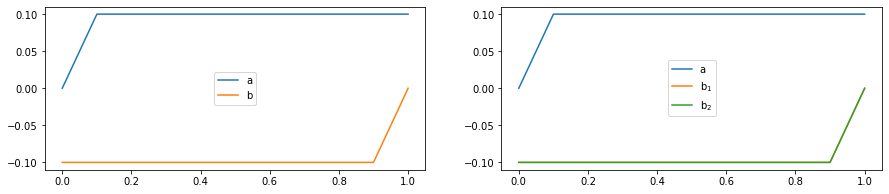

In [18]:
# Numerical test
ε = 1e-1

fig, ax = plt.subplots(1, 2, figsize=(15,3))

ax[0].plot(xᵣ, xᵣ - maximum(0, xᵣ - ε), label = 'a')
ax[0].plot(xᵣ, xᵣ - minimum(1, xᵣ + ε), label = 'b')

ax[1].plot(xᵣ, minimum(xᵣ, ε), label = 'a')
ax[1].plot(xᵣ, maximum(xᵣ-1, -ε), label = '$\mathrm{b}_1$')
ax[1].plot(xᵣ, -minimum(1-xᵣ, ε), label = '$\mathrm{b}_2$')
ax[0].legend();    ax[1].legend()
plt.show()

Here we use the fact that
\begin{align*}
    \max\{w_1,w_2\} = \frac{1}{2} \big( w_1 + w_2 + |w_1 - w_2| \big)
    \qquad \text{and}\qquad
    \min\{w_1,w_2\} = \frac{1}{2} \big( w_1 + w_2 - |w_1 - w_2| \big).
\end{align*}
As a result
\begin{align*}
    x_1 - a &= x_1 - \frac{1}{2} \big( x_1-\varepsilon + |x_1-\varepsilon| \big) = \frac{1}{2} \big(x_1 + \varepsilon - |x_1-\varepsilon| \big) = \min \{x_1, \varepsilon\}
    \\
    x_1 - b &= x_1 - \frac{1}{2} \big( 1+ x_1+\varepsilon - |1 -x_1-\varepsilon| \big) = -\frac{1}{2} \big( 1-x_1+\varepsilon - |1 -x_1-\varepsilon| \big) = \max \{ x_1 - 1, -\varepsilon \} = -\min \{ 1 - x_1, \varepsilon \}
\end{align*}

Hence we obtain (also using radial symmetry):
\begin{align*}
    \mathsf{G}(x) &= \int\limits_{x_2 - d}^{x_2 - c} \int\limits_{x_1-b}^{x_1 - a} K (u) \dif u 
    \quad = \int\limits_{-\min\{1-x_2, \varepsilon\}}^{ \min\{x_2,\varepsilon\} } \,\, \int\limits_{-\min\{1-x_1, \varepsilon\}}^{ \min\{x_1,\varepsilon\} } K (u) \dif u 
    \\
    &=
    \bigg[
        \int\limits_{0}^{ \min\{x_2,\varepsilon\} } \int\limits_{0}^{ \min\{x_1,\varepsilon\} } 
        +
        \int\limits_{0}^{\min\{1-x_2, \varepsilon\}} \int\limits_{0}^{ \min\{x_1,\varepsilon\} }
        +
        \int\limits_{0}^{ \min\{x_2,\varepsilon\} } \,\, \int\limits_{0}^{\min\{1-x_1, \varepsilon\}}
        +
        \int\limits_{0}^{\min\{1-x_2, \varepsilon\}} \int\limits_{0}^{\min\{1-x_1, \varepsilon\}}
    \bigg]
    K (u) \dif u
    \\
    &= 
    \begin{cases}
        \IK_{( \min\{x_1,\varepsilon\} , \min\{x_2,\varepsilon\} )} + \IK_{( \min\{x_1,\varepsilon\}, \min\{1-x_2, \varepsilon\})} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{x_2,\varepsilon\} )} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{1-x_2, \varepsilon\} )}
        & \text{if } x \in (0,1)^2,
            \\
        \IK_{(\varepsilon, \min\{x_2,\varepsilon\})} + \IK_{ (\varepsilon, \min\{1-x_2, \varepsilon\}) }   & \text{if } x_1 \in \{0,1\} \text{ and } x_2 \in (0,1),
        \\
        \IK_{(\min\{x_1,\varepsilon\},\varepsilon)} + \IK_{ (\min\{1-x_1, \varepsilon\},\varepsilon) }   & \text{if } x_1 \in (0,1) \text{ and } x_2 \in \{0,1\},
        \\
        (8\pi)^{-1} \varepsilon^{2} \big[ -6 + \log 4 + \pi + 4\log (\varepsilon^2) \big] & \text{if } x \in \big\{ (0,0), (0,1), (1,0), (1,1) \big\}.
    \end{cases}
\end{align*}

Where we have used that:
\begin{align*}
    \mathsf{G}(0,0) &=
    \IK_{( 0,0 )} + \IK_{( 0,\varepsilon)} + \IK_{(\varepsilon, 0)} + \IK_{( \varepsilon, \varepsilon )} = \IK_{( \varepsilon, \varepsilon )},
    \\
    \mathsf{G}(0,1) &= \IK_{(\varepsilon,\varepsilon)} = \mathsf{G}(1,0) = \mathsf{G}(1,1),
    \\
    \mathsf{G}(0,x_2) &= \IK_{(\varepsilon, \min\{x_2,\varepsilon\})} + \IK_{ (\varepsilon, \min\{1-x_2, \varepsilon\}) },
    & \mathsf{G}(x_1,0) &= \IK_{(\min\{x_1,\varepsilon\},\varepsilon)} + \IK_{ (\min\{1-x_1, \varepsilon\},\varepsilon) },
    \\
    \mathsf{G}(1,x_2) &= \IK_{(\varepsilon, \min\{x_2,\varepsilon\})} + \IK_{ (\varepsilon, \min\{1-x_2, \varepsilon\}) },
    & \mathsf{G}(x_1,1) &= \IK_{(\min\{x_1,\varepsilon\},\varepsilon)} + \IK_{ (\min\{1-x_1, \varepsilon\},\varepsilon) }
\end{align*}

In [19]:
def limits(x):
    ε = 0.5
    return [min(x[0],ε),min(x[1],ε)], [min(x[0],ε),min(1-x[1],ε)], [min(1-x[0],ε),min(x[1],ε)], [min(1-x[0],ε),min(1-x[1],ε)]

In [20]:
limits([0.1,1])

([0.1, 0.5], [0.1, 0], [0.5, 0.5], [0.5, 0])

In [21]:
ε = symbols('ε');
I.subs({y_2:y_1}).subs(y_1,ε).simplify()

ε**2*(2*log(ε**2) - 6 + log(4) + pi)/(8*pi)

A nice consequence of what we have found is that for $\rho = \mathbb{1}_\square$, we get that $
    \iint\limits_▮ K (x-y) \, \rho(y) \dif y = \rho(x) \mathsf{G}(x)$; i.e., the approximation is exact.

---

Let us now visualise this integral:

In [1]:
import numpy as np
from matplotlib import cm

In [4]:
xv, yv = np.meshgrid(xᵣ, xᵣ)

In [5]:
Points = np.vstack([xv.ravel(), yv.ravel()])

In [6]:
def Conv_I(Points):
    # The input is expected to be of size [2,n]
    Points = np.asarray(Points)
    n = 1 if Points.ndim == 1 else Points.shape[1]
    Points = Points[::,np.newaxis] if (n == 1 and Points.ndim == 1) else Points
    I_All = np.zeros(n)                              # We expect either a point or a cloud of points
    
    # Split data into two cases
    ZP = ~np.any((Points == 0), axis=0)              # Identifies points without a zero coordinate
    # The function is 0 at any point with a zero coordinate, by construction we do nothing
    
    # Evaluate at points in mesh without a zero coordinate
    x, y = Points[0, ZP], Points[1, ZP]
    I  = x * y * np.log( x**2 + y**2 )
    I += (x**2 - y**2) * np.arctan2(y, x)
    I -= 3 * x * y
    I /= (4*np.pi)
    I += 0.125 * y**2
    
    I_All[ZP] = I
    return I_All

In [124]:
I_at_Mesh = Conv_I(Points).reshape(500,500)

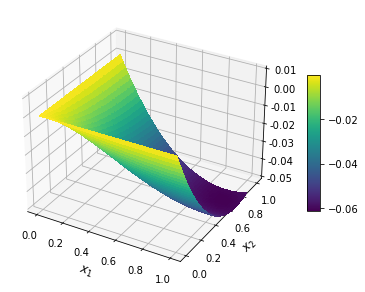

In [158]:
# Plot of I
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, I_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.05, 0.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

Now let's compute
\begin{align*}
    \mathsf{J}(x) = \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2).
\end{align*}

In [170]:
Shift_1 = np.zeros_like(Points);    Shift_1[0,:].fill(1)
Shift_2 = np.zeros_like(Points);    Shift_2[1,:].fill(1)
Shift_3 = np.ones_like(Points)

In [173]:
J_at_Mesh = I_at_Mesh + (Conv_I(abs(Points - Shift_1)) + Conv_I(abs(Points - Shift_2)) + Conv_I(abs(Points - Shift_3))).reshape(500,500)

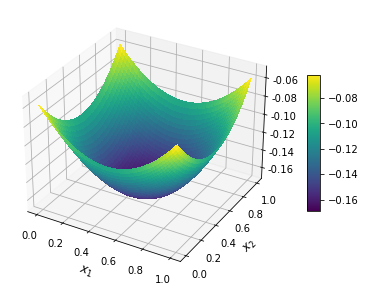

In [186]:
# Plot of J
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, J_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.17, -0.05)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

In [203]:
display('Max: '+str(J_at_Mesh.max()), I.subs({y_2:y_1}).subs(y_1,ε).simplify().subs(ε,1))
display('Min: '+str(J_at_Mesh.min()), 4 * I.subs({y_2:y_1}).subs(y_1,ε).simplify().subs(ε,Rational(1,2)))

'Max: -0.058573514599680104'

(-6 + log(4) + pi)/(8*pi)

'Min: -0.16889081267020378'

(-6 - log(4) + pi)/(8*pi)

Now let's compute
\begin{align*}
    \mathsf{G}(x) = \IK_{( \min\{x_1,\varepsilon\} , \min\{x_2,\varepsilon\} )} + \IK_{( \min\{x_1,\varepsilon\}, \min\{1-x_2, \varepsilon\})} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{x_2,\varepsilon\} )} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{1-x_2, \varepsilon\} )}
\end{align*}

For these tests, $\varepsilon \leq \frac{1}{2}$, as a result, the minimum is
\begin{align*}
    \mathsf{G}(0.5,0.5) = \IK_{( \min\{0.5,\varepsilon\} , \min\{0.5,\varepsilon\} )} + \IK_{( \min\{0.5,\varepsilon\}, \min\{0.5, \varepsilon\})} + \IK_{( \min\{0.5, \varepsilon\}, \min\{0.5,\varepsilon\} )} + \IK_{( \min\{0.5, \varepsilon\}, \min\{0.5, \varepsilon\} )}
    = 4\IK( \varepsilon, \varepsilon)
\end{align*}

In [288]:
ε = 0.1

In [294]:
ε̂ = symbols('ε');

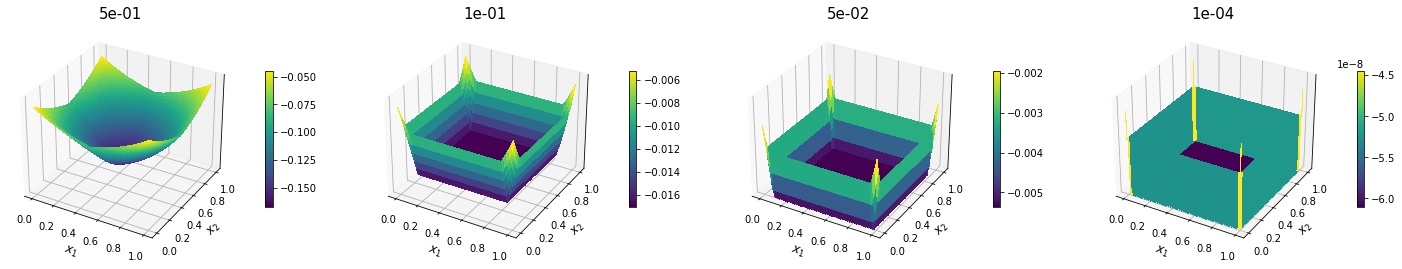

In [558]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I(minimum(Points,ε)) + Conv_I( minimum(abs(Points - Shift_1),ε) ) + 
             Conv_I( minimum(abs(Points - Shift_2),ε) ) + Conv_I( minimum(abs(Points - Shift_3),ε) )).reshape(500,500)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(xv, yv, G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=False)
    ax[i].set_zlim(lim_inf, lim_sup)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.1)    # Add a color bar which maps values to colors.
    ax[i].set_title('{:.0e}'.format(ε), fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=-lim_inf)
    #ax[i].set_xscale('function', functions=(forward, inverse))
    #ax[i].yaxis._set_scale('asinh', linear_width=1e-7)
    #ax[i].xaxis._set_scale('asinh')


for axis in ax:    axis.set_xlabel('$x_1$', fontsize=12);    axis.set_ylabel('$x_2$', fontsize=12)

plt.show()

In [580]:
def forward(a):    return -np.log(1.002/(a+0.001) - 1)
def inverse(a):    return (1001 * np.exp(a) - 1) / (1000 *( np.exp(a) + 1 ) )

In [830]:
# Generate points with higher concentration at the extremes
ψ = 5e-3
nodes = np.r_[ψ * (np.r_[-1,np.polynomial.chebyshev.chebpts1(198),1]/2 + 0.5), 1 - ψ * (np.r_[-1,np.polynomial.chebyshev.chebpts1(198),1]/2 + 0.5)]
nodes = np.r_[(1-2*ψ) * (np.polynomial.chebyshev.chebpts1(100)/2 + 0.5) + ψ, nodes]
nodes.sort()

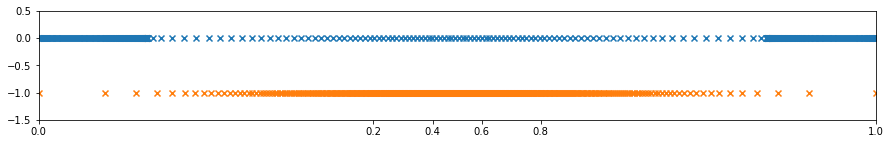

In [831]:
fig, ax = plt.subplots(1, 1, figsize=(15,2))
ax.scatter(nodes, nodes.size * [0], marker='x', label='New nodes')
ax.scatter(xᵣ, nodes.size * [-1], marker='x', label='Previous nodes')
ax.set_xlim(0,1)
ax.set_ylim(-1.5,0.5)
ax.set_xscale('function', functions=(forward, inverse))

In [832]:
X, Y = np.meshgrid(nodes, nodes)
PoIS = np.vstack([X.ravel(), Y.ravel()])

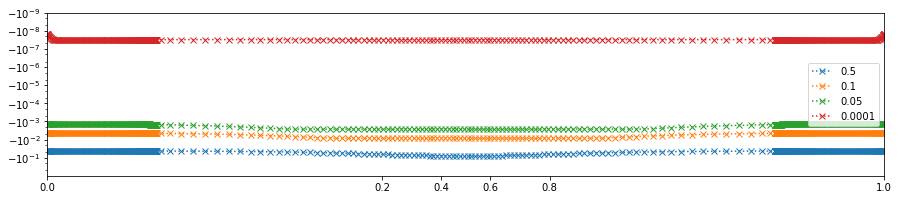

In [866]:
fig, ax = plt.subplots(1, 1, figsize=(15,3))

for ε in Vals_ε:
    G_Mesh = (Conv_I(minimum(PoIS[:,:500],ε)) + Conv_I( minimum(abs(PoIS - Shift_1)[:,:500],ε) ) + 
             Conv_I( minimum(abs(PoIS - Shift_2)[:,:500],ε) ) + Conv_I( minimum(abs(PoIS - Shift_3)[:,:500],ε) ))

    ax.plot(nodes, G_Mesh, ':x', label = ε)
    
ax.set_xlim(0,1)
ax.set_xscale('function', functions=(forward, inverse))
ax.set_yscale('asinh', linear_width=1e-10)
ax.set_ylim(-1,-10e-10)
ax.legend(loc='center right')
plt.show()

Plot under new scaling and previous mesh:

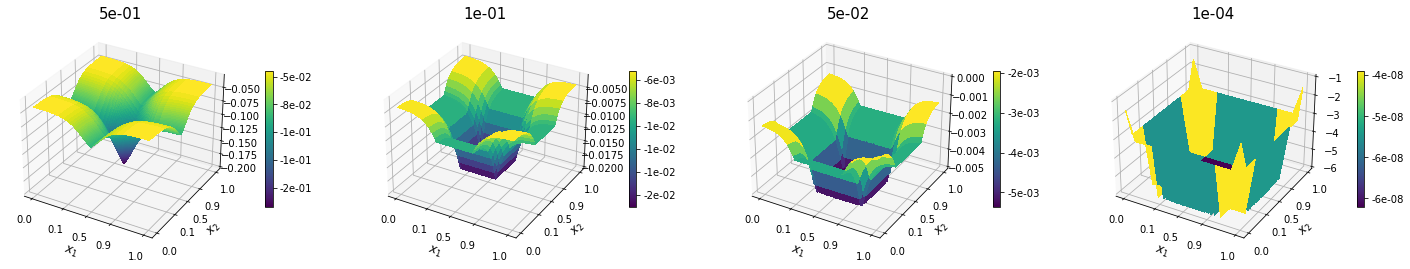

In [684]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I(minimum(Points,ε)) + Conv_I( minimum(abs(Points - Shift_1),ε) ) + 
             Conv_I( minimum(abs(Points - Shift_2),ε) ) + Conv_I( minimum(abs(Points - Shift_3),ε) )).reshape(500,500)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(xv), forward(yv), G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=False)
    ax[i].set_zlim(lim_inf, lim_sup)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.1, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title('{:.0e}'.format(ε), fontsize=15)
    #ax[i].zaxis._set_scale('symlog', linthresh=-lim_inf)
    


for axis in ax:    
    axis.set_xlabel('$x_1$', fontsize=12);    axis.set_ylabel('$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( np.asarray([0, 0.05, 0.5, 0.95, 1]) )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.1f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])

plt.show()

Plot under new scaling and new mesh:

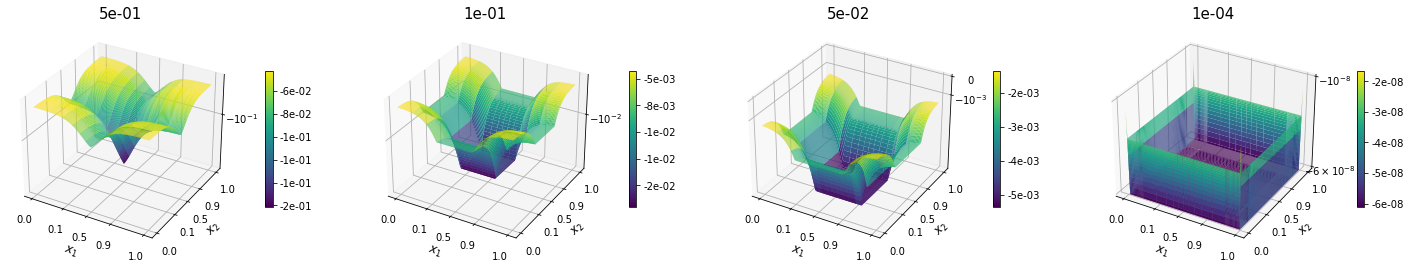

In [875]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I(minimum(PoIS,ε)) + Conv_I( minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( minimum(abs(PoIS - Shift_3),ε) )).reshape(500,500)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1)
    ax[i].set_zlim(lim_inf, lim_sup)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.1, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title('{:.0e}'.format(ε), fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)
    


for axis in ax:    
    axis.set_xlabel('$x_1$', fontsize=12);    axis.set_ylabel('$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( np.asarray([0, 0.05, 0.5, 0.95, 1]) )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.1f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])

plt.show()

Plot under new scaling, previous mesh, and some additional styling:

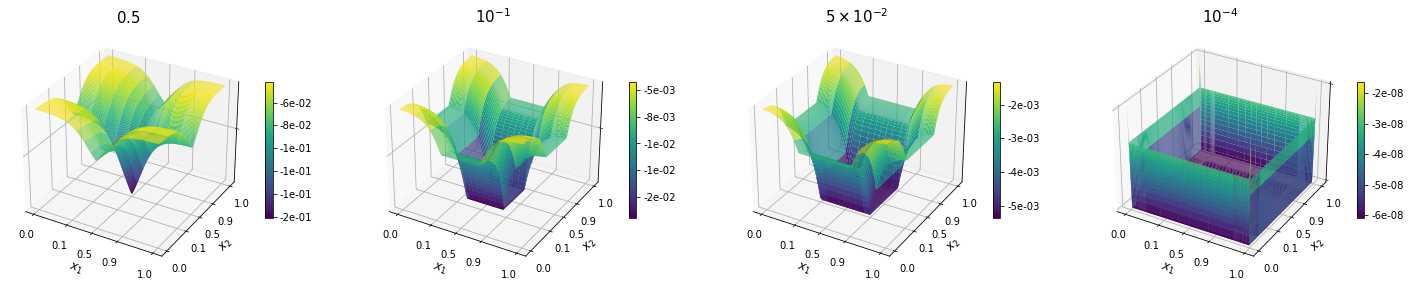

In [881]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I(minimum(PoIS,ε)) + Conv_I( minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( minimum(abs(PoIS - Shift_3),ε) )).reshape(500,500)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1)
    ax[i].set_zlim(MinG, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)


for axis in ax:    
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( np.asarray([0, 0.05, 0.5, 0.95, 1]) )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.1f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])

plt.show()

Plot under adaptive scaling, previous mesh, and some additional styling:

In [936]:
def forward(a):
    s = ε**1;    t = 2 * s
    return -np.log( (1+t)/(a+s) - 1)
def inverse(a):    
    s = ε**1;    t = 2 * s
    return (t+1) * np.exp(a) / ( np.exp(a) + 1 )   -  s

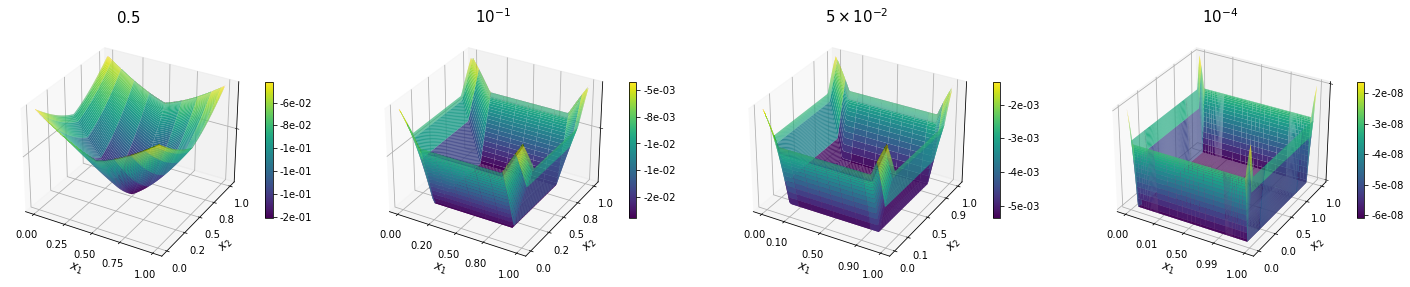

In [968]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I(minimum(PoIS,ε)) + Conv_I( minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( minimum(abs(PoIS - Shift_3),ε) )).reshape(500,500)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1)
    ax[i].set_zlim(MinG, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)

it = 0
Tickers = np.asarray([[0, 0.25, 0.5, 0.75, 1],[0, 0.2, 0.5, 0.8, 1],[0, 0.1, 0.5, 0.9, 1],[0, 0.01, 0.5, 0.99, 1]])
for axis in ax:    
    ε = Vals_ε[it]
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( Tickers[it] )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = Tickers[it] #inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.2f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])
    
    it += 1

plt.show()

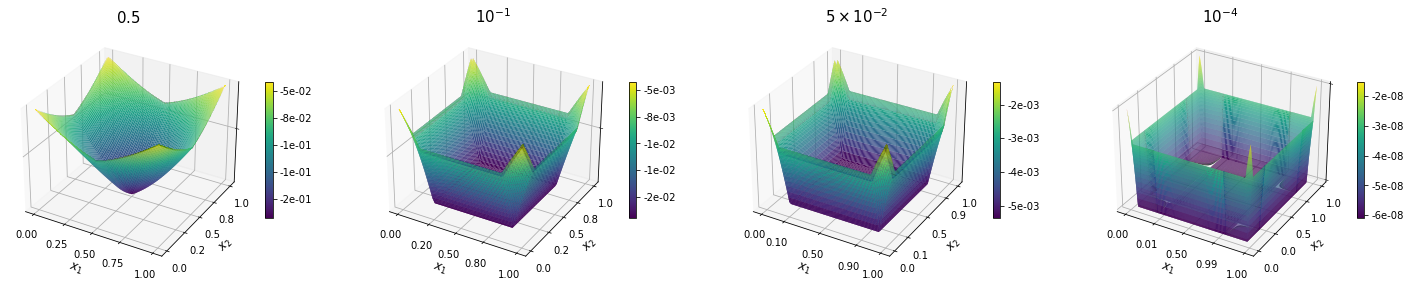

In [969]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I(minimum(PoIS,ε)) + Conv_I( minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( minimum(abs(PoIS - Shift_3),ε) )).reshape(500,500)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1, cstride=1)
    ax[i].set_zlim(MinG-1e-8, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)

it = 0
Tickers = np.asarray([[0, 0.25, 0.5, 0.75, 1],[0, 0.2, 0.5, 0.8, 1],[0, 0.1, 0.5, 0.9, 1],[0, 0.01, 0.5, 0.99, 1]])
for axis in ax:    
    ε = Vals_ε[it]
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( Tickers[it] )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = Tickers[it] #inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.2f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])
    
    it += 1

plt.show()

---